# Libraries

In [1]:
import torch
import os
import glob
from IPython.display import Image, display

%cd yolov5
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

c:\Users\marin\OneDrive\Desktop\yolov5-fire-detection-main\yolov5
Setup complete. Using torch 2.2.1+cpu (CPU)


C:\Users\marin\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Train YOLOv5 model

In [ ]:
!python train.py --img 640 --batch 16 --epochs 3 --data ../fire_config.yaml --weights yolov5s.pt --workers 1

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

In [3]:
from utils.plots import plot_results
plot_results('runs/train/exp2/results.csv')

### Prediction on Images

In [5]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source ../fire2.png

detect: weights=['runs/train/exp4/weights/best.pt'], source=../fire2.png, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-3-25 Python-3.12.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\marin\OneDrive\Desktop\yolov5-fire-detection-main\fire2.png: 448x640 2 fires, 132.2ms
Speed: 1.0ms pre-process, 132.2ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp12


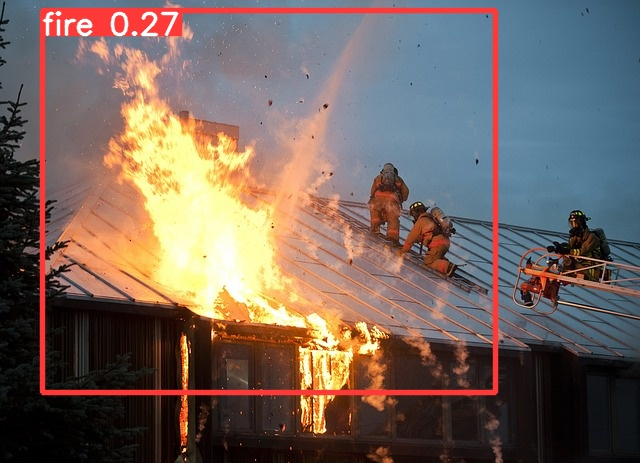

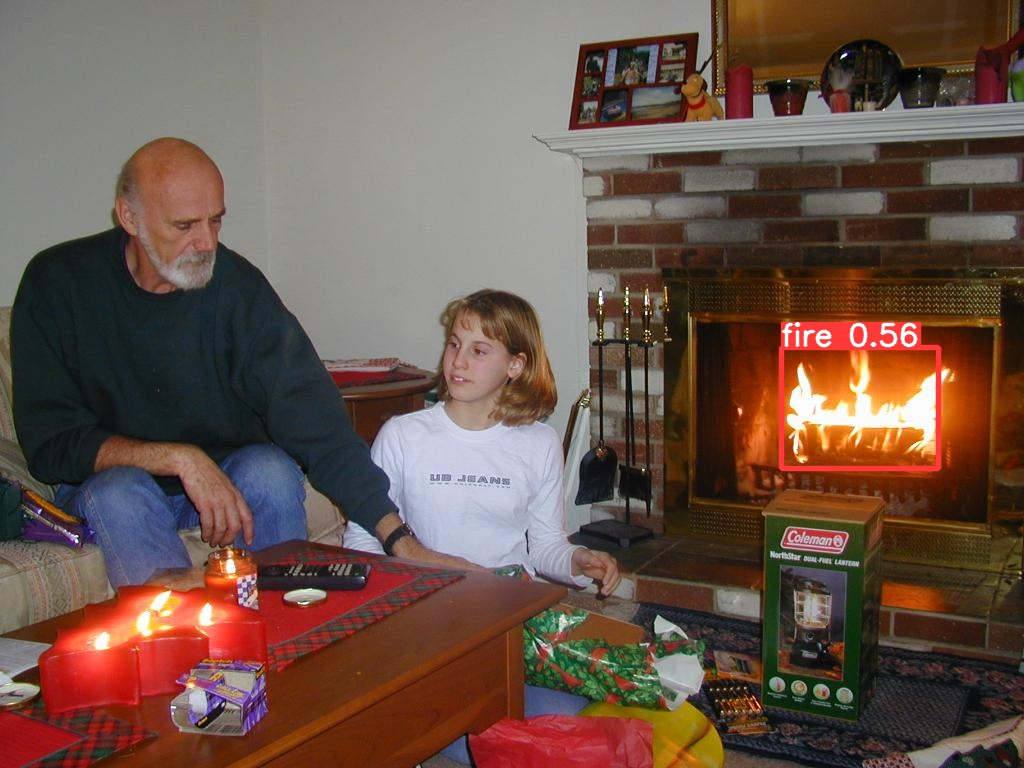

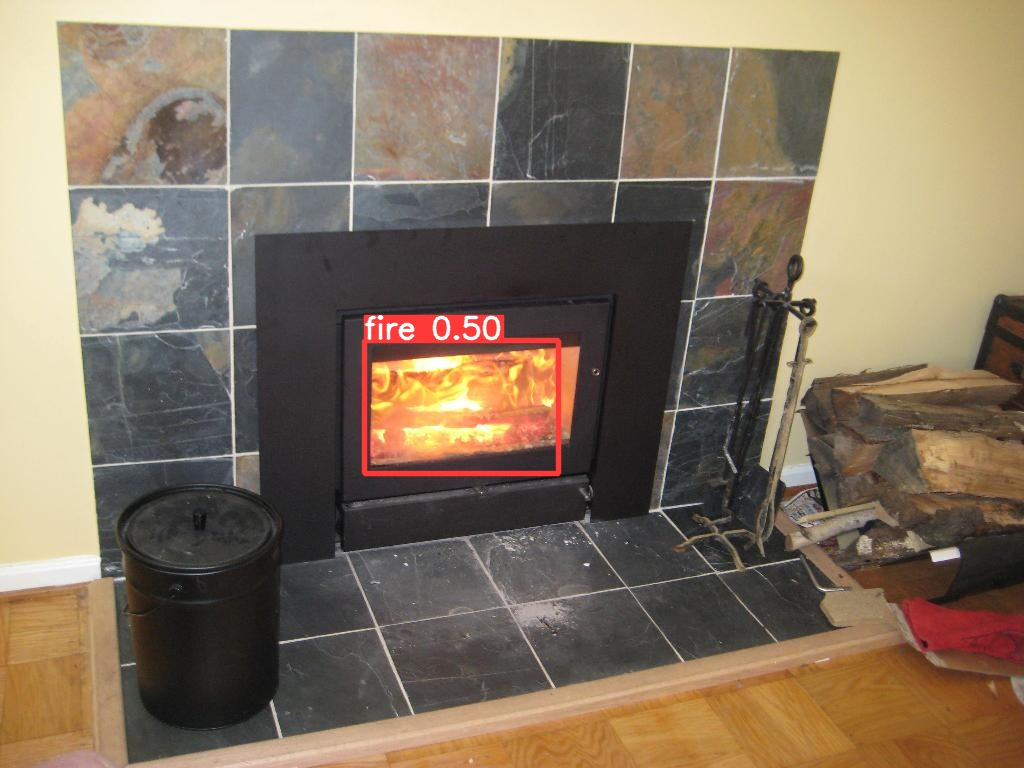

In [4]:
#display inference on some test images
images = glob.glob('runs/detect/exp/*.jpg')

for imageName in images[:3]: #assuming JPG
    display(Image(filename=imageName, width=400))

### Prediction on Video 

In [6]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source ../firee.mp4

detect: weights=['runs/train/exp4/weights/best.pt'], source=../firee.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-3-25 Python-3.12.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1374) C:\Users\marin\OneDrive\Desktop\yolov5-fire-detection-main\firee.mp4: 384x640 1 fire, 123.0ms
video 1/1 (2/1374) C:\Users\marin\OneDrive\Desktop\yolov5-fire-detection-main\firee.mp4: 384x640 1 fire, 101.1ms
video 1/1 (3/1374) C:\Users\marin\OneDrive\Desktop\yolov5-fire-detection-main\firee.mp4: 384x640 1 fire, 106.3ms
video 1/1 (4/1374) C:\Users\marin

In [22]:
import cv2
vidcap = cv2.VideoCapture('runs/detect/exp2/input.mp4')
success,image = vidcap.read()
images = []
while success:
    success,image = vidcap.read()
    if success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

In [ ]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml')

def create_animation(ims):
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    im = plt.imshow(ims[0])

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//12)

create_animation(images)

# Visualize feature map

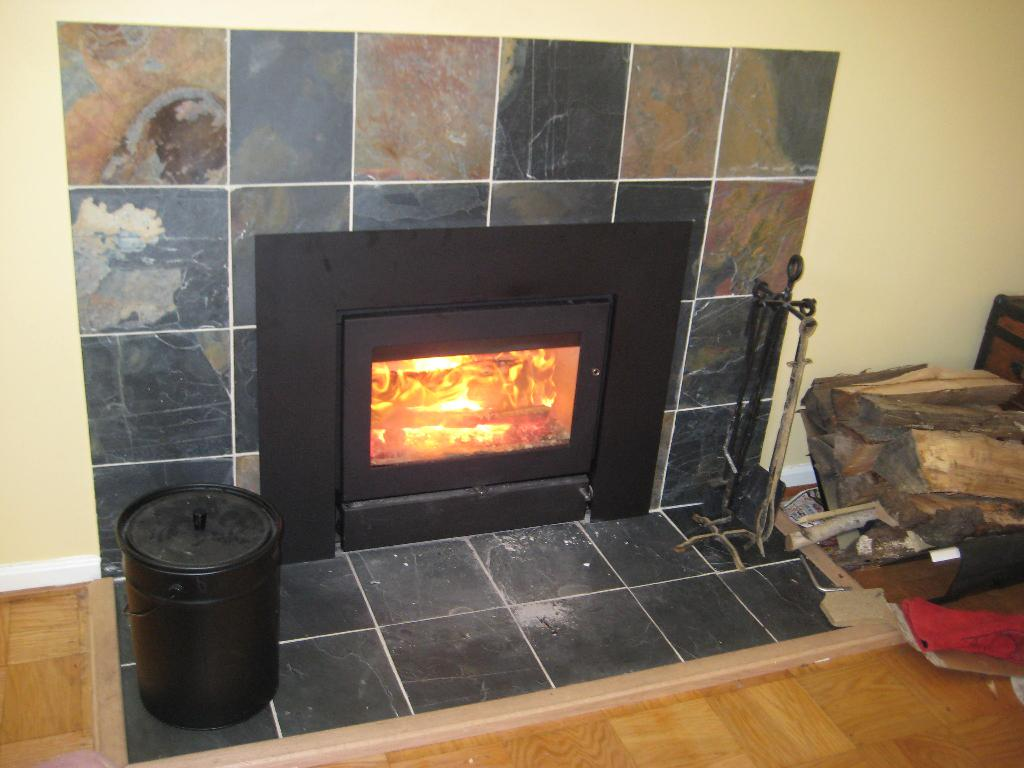

In [20]:
image_path = "../datasets/fire/val/images/004dec94c5de631f.jpg"
display(Image(filename=image_path, width=400))

In [17]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source {image_path} --visualize

E:\Programs\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
E:\Programs\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/fire/val/images/004dec94c5de631f.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
requirements: requests>=2.23.0 not found and is required by YOLOv5, attemptin

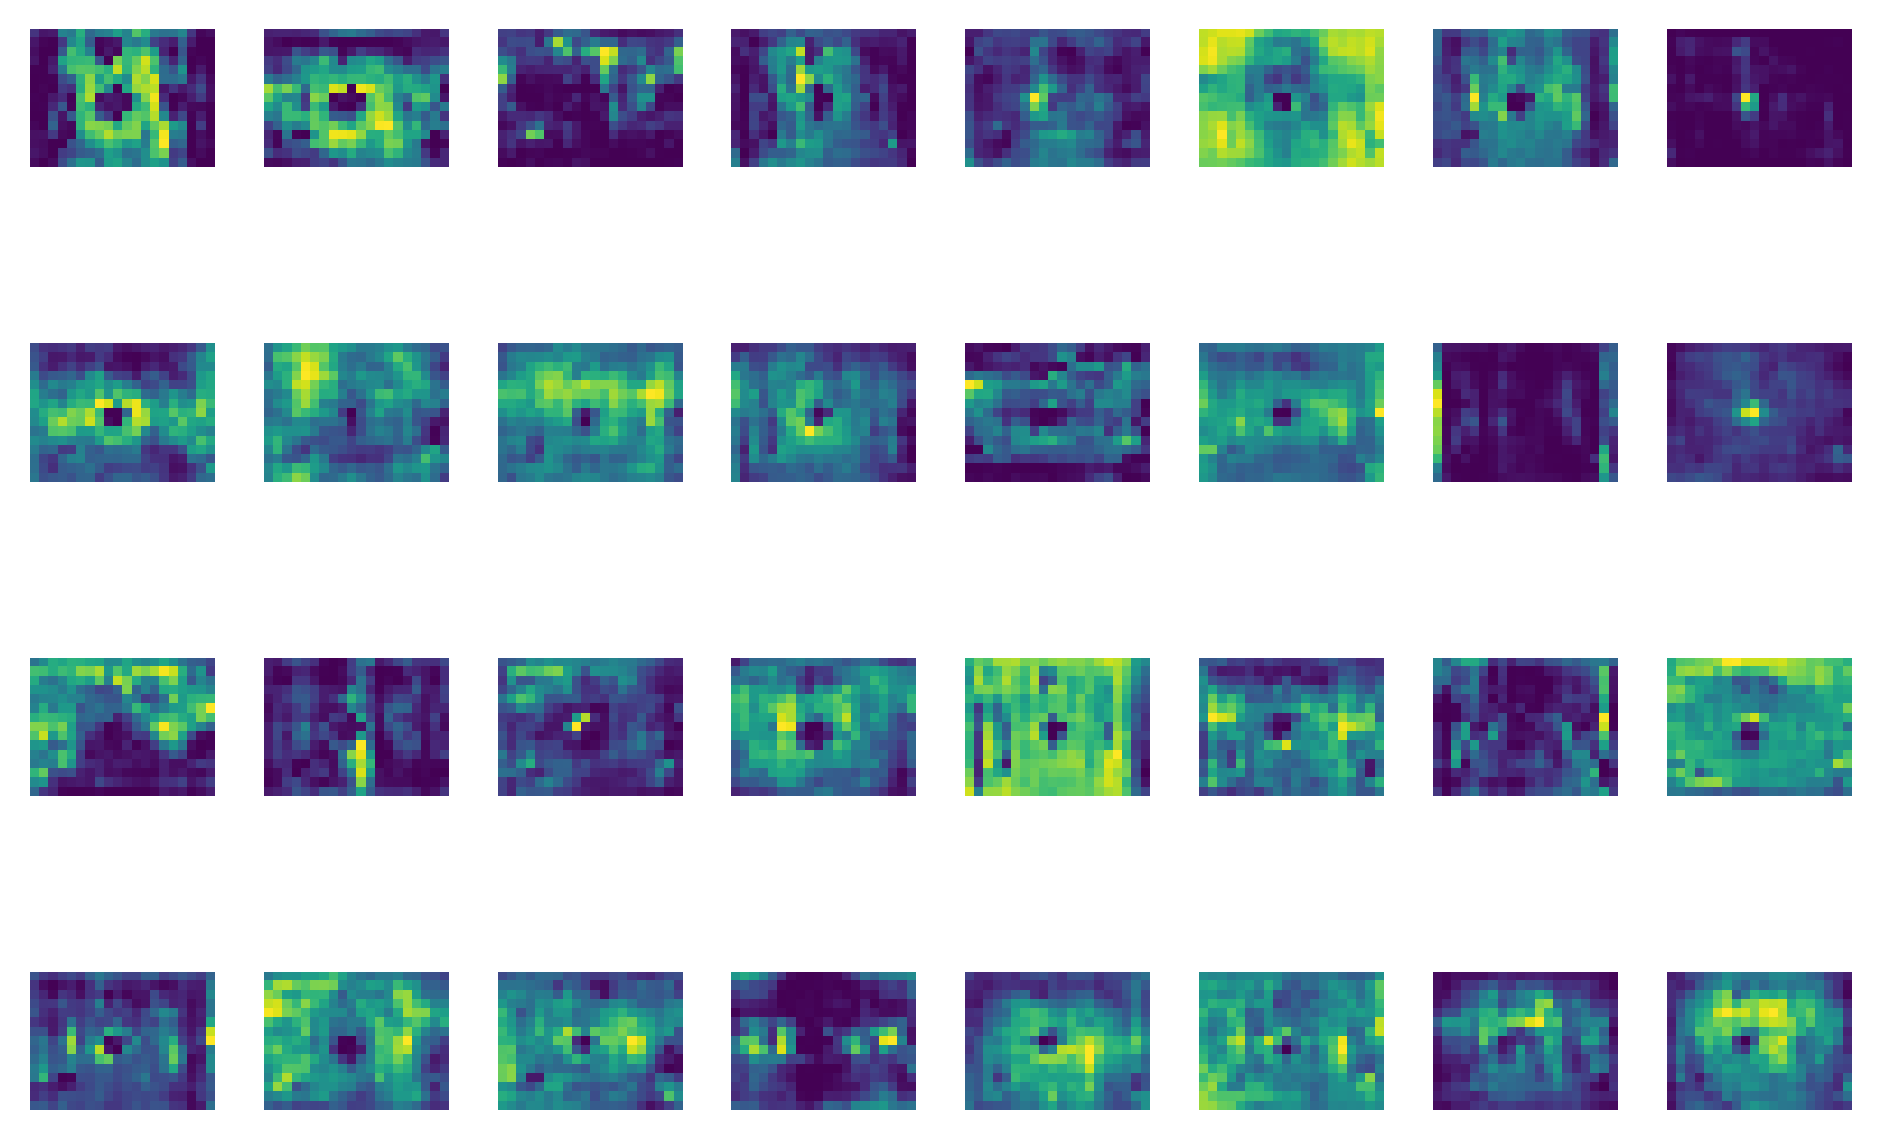

In [21]:
display(Image(filename="runs/detect/exp3/004dec94c5de631f/stage23_C3_features.png"))